# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Syahrul Aji Prayoga
- Email: syahrulprayoga@gmail.com
- Id Dicoding: syahrulprayoga

## Menentukan Pertanyaan Bisnis

- Bagaimana hubungan antara musim dan jumlah sewa sepeda harian?
- Bagaimana performa jumlah sewa sepeda harian pada 1 tahun terakhir? (Tahun 2012)
- Bagaimana performa jumlah sewa sepeda harian berdasarkan jam sewa?

## Menyaipkan semua library yang dibuthkan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [6]:
day_df = pd.read_csv("https://raw.githubusercontent.com/SyahrulPrayogaa/data-analysis-with-python/main/data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/SyahrulPrayogaa/data-analysis-with-python/main/data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Pada tahap ini dilakukan pengecekan tipe data, missing value, duplicated data, dan innacurated data

#### **Menilai Data** ```day_df```

In [12]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


tipe data _dteday_ seharusnya bertipe datetime

In [14]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

tidak terdapat missing value data

In [13]:
print("Jumlah Duplikasi Data: ", day_df.duplicated().sum())

Jumlah Duplikasi Data:  0


In [15]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### **Menilai Data** ```hour_df```

In [16]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


tipe data _dteday_ seharusnya bertipe datetime

In [17]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

tidak terdapat missing value data

In [18]:
print("Jumlah Duplikasi Data: ", hour_df.duplicated().sum())

Jumlah Duplikasi Data:  0


In [19]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Menangani **Tipe Data** _dteday_ pada ```day_df``` dan ```hour_df```


In [22]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

In [23]:
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

## Exploratory Data Analysis (EDA)

**Menggabungkan Data day dan Hour dalam 1 dataframe**

In [24]:
bike_sharing_df = day_df.merge(hour_df, on='dteday', how='inner', suffixes=('_daily', '_hourly'))
print(bike_sharing_df.shape)

bike_sharing_df.loc[bike_sharing_df["dteday"].isnull()]
bike_sharing_df.head()

(17379, 32)


,instant_daily,dteday,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,...,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Explore Data ``` bike_sharing_df ```

In [32]:
bike_sharing_df.describe(include="all")

<ipython-input-32-3127052b5744>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  bike_sharing_df.describe(include="all")


,instant_daily,dteday,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,...,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly
count,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,367.172622,NaN,2.501640,0.502561,6.537775,0.028770,3.003683,0.682721,1.391680,0.496987,...,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,210.072051,NaN,1.106918,0.500008,3.438776,0.167165,2.005771,0.465431,0.540501,0.182445,...,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,...,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,185.000000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.340000,...,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


Mengetahui jumlah penyewa sepeda harian berdasarkan musim

In [51]:
bike_sharing_df.groupby(by="season_daily").cnt_daily.sum()

season_daily
1    11179147
2    22024071
3    25420803
4    20167029
Name: cnt_daily, dtype: int64

mengetahui jumlah penyewa sepeda selama 1 tahun terakhir (Tahun 2012)

In [72]:
bike_sharing_df.groupby(by=["yr_daily","mnth_daily"]).cnt_hourly.count()

yr_daily  mnth_daily
0         1             688
          2             649
          3             730
          4             719
          5             744
          6             720
          7             744
          8             731
          9             717
          10            743
          11            719
          12            741
1         1             741
          2             692
          3             743
          4             718
          5             744
          6             720
          7             744
          8             744
          9             720
          10            708
          11            718
          12            742
Name: cnt_hourly, dtype: int64

In [82]:
bike_sharing_df.query("yr_daily == 1").groupby(["mnth_daily"])["cnt_daily"].mean()

mnth_daily
1     3121.959514
2     3558.907514
3     5319.096904
4     5808.604457
5     6318.225806
6     6761.000000
7     6567.967742
8     6919.451613
9     7285.766667
10    6719.533898
11    5088.158774
12    3998.893531
Name: cnt_daily, dtype: float64

Mengetahui jumlah penyewa sepeda berdasarkan jam sewa

In [36]:
bike_sharing_df.groupby(by="hr").cnt_hourly.nunique()

hr
0     162
1     120
2     100
3      60
4      25
5      58
6     187
7     374
8     467
9     322
10    312
11    337
12    383
13    377
14    385
15    383
16    414
17    494
18    471
19    423
20    360
21    294
22    252
23    196
Name: cnt_hourly, dtype: int64

## Visualization & Explanatory Analysis

### Bagaimana hubungan antara musim dan jumlah sewa sepeda harian?

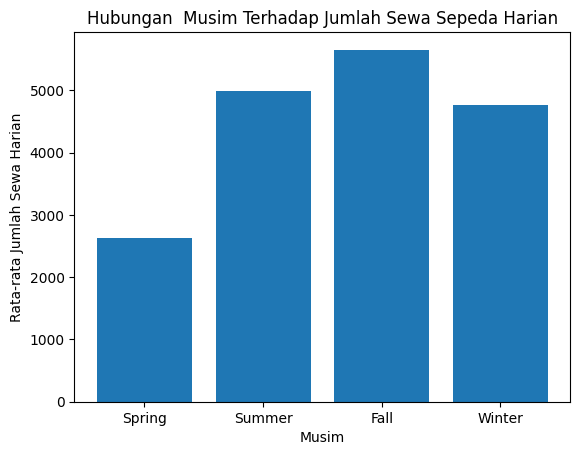

In [45]:
data_musim = bike_sharing_df.groupby('season_daily')['cnt_daily'].mean()
nama_musim = ['Spring', 'Summer', 'Fall', 'Winter']
plt.bar(nama_musim, data_musim)
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Sewa Harian')
plt.title('Hubungan  Musim Terhadap Jumlah Sewa Sepeda Harian')
plt.show()

### Bagaimana performa jumlah sewa sepeda harian pada 1 tahun terakhir? (Tahun 2012)

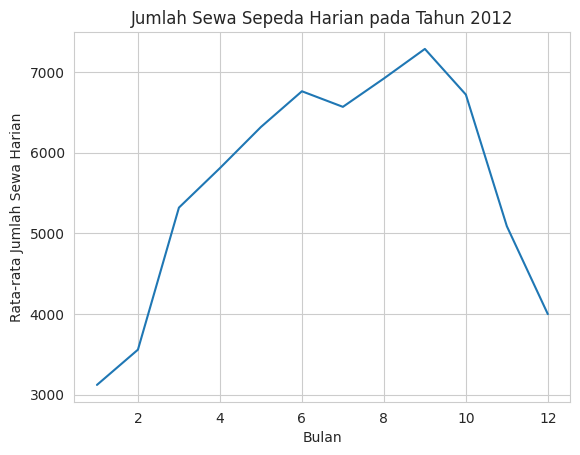

In [84]:
data_bulan = bike_sharing_df.query("yr_daily == 1").groupby(["mnth_daily"])["cnt_daily"].mean()
nama_bulan = [1,2,3,4,5,6,7,8,9,10,11,12]
plt.plot(nama_bulan , data_bulan)
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Jumlah Sewa Harian')
plt.title("Jumlah Sewa Sepeda Harian pada Tahun 2012")
plt.show()

### Bagaimana performa jumlah sewa sepeda harian berdasarkan jam sewa?

<ipython-input-85-92d99089d429>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="hr", y="cnt_hourly", data=bike_sharing_df, ci=None)


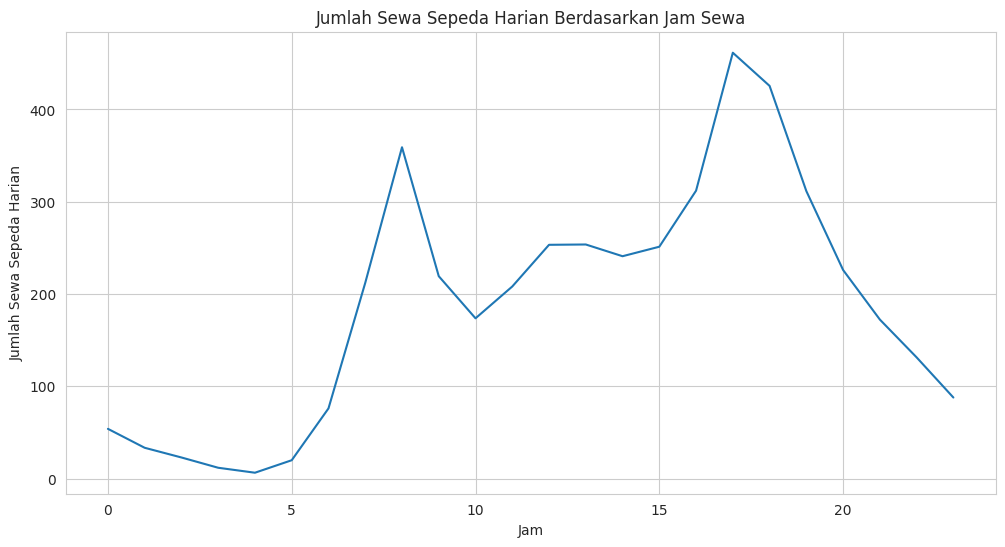

In [85]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x="hr", y="cnt_hourly", data=bike_sharing_df, ci=None)
plt.title("Jumlah Sewa Sepeda Harian Berdasarkan Jam Sewa")
plt.xlabel("Jam")
plt.ylabel("Jumlah Sewa Sepeda Harian")
plt.show()

## Conclusion

- Bagaimana hubungan antara musim dan jumlah sewa sepeda harian?



```
berdasarkan grafik diatas, dapat disimpulkan bahwa jumlah sewa sepeda terbanyak terdapat saat musim gugur (Fall)
```



- Bagaimana performa jumlah sewa sepeda harian pada 1 tahun terakhir? (Tahun 2012)



```
Berdasarkan grafik diatas, jumlah sewa sepeda pada tahun 2012 selalu mengalami peningkatan dari bulan januari sampai puncaknya pada bulan september, walaupun terdapat sedikit penurunan pada bulan juli.
memasuki bulan oktober sampai desember, jumlah sewa sepeda selalu mengalami penurunan.
```



- Bagaimana performa jumlah sewa sepeda harian berdasarkan jam sewa?



```
Berdasarkan grafik diatas, jam jumlah sewa sepeda meningkat sekitar jam 8 pagi dan sekitar jam 5 atau 6 sore.
```



In [88]:
bike_sharing_df.to_csv("bike_sharing.csv", index=False)